In [43]:
import kagglehub

path = kagglehub.dataset_download("ananthu017/emotion-detection-fer")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\hp\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1


In [44]:
import os
# print(os.listdir(path))

for item in os.listdir(path):
  item_path = os.path.join(path, item)
  if os.path.isdir(item_path):
    print(f'---{item}')
    print(os.listdir(item_path))

---test
['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
---train
['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [45]:
import tensorflow as tf
import numpy as np

train_path = os.path.join(path, 'train')
test_path = os.path.join(path, 'test')

train_data = tf.keras.utils.image_dataset_from_directory(train_path , batch_size=1000 ,image_size=(48,48) , label_mode='categorical')
test_data = tf.keras.utils.image_dataset_from_directory(test_path , batch_size=1000,image_size=(48,48) , label_mode='categorical')

# print(type(train_data)) # tensorflow.python.data.ops.prefetch_op._PrefetchDataset

# for i in train_data:
#   print(type(i)) # tuple
#   print(i[1])
#   break


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [46]:
print(train_data.class_names)
classe = train_data.class_names
for images , labels in train_data:
  print(images.shape)
  print(labels.shape)
  print(labels[1])
  break

# print(labels)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
(1000, 48, 48, 3)
(1000, 7)
tf.Tensor([1. 0. 0. 0. 0. 0. 0.], shape=(7,), dtype=float32)


TypeError: only integer scalar arrays can be converted to a scalar index

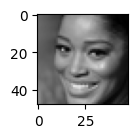

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))

for images , labels in train_data.take(2):
  for i in range(1,10):
    # print(images.shape)
    # print(np.unique(labels))
    image = images[i].numpy().astype('uint8')
    label = labels[i].numpy().astype('uint8')
    # print(image)
    plt.subplot(3,3,i)
    plt.imshow(image)
    plt.title(classe[label])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import tensorflow as tf

for images, labels in train_data.take(1):
    for i in range(5):
        img = images[i].numpy().astype('uint8')
        img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.imshow(classe[labels[i]], img_bgr)
        cv2.waitKey(0)
cv2.destroyAllWindows()


In [48]:
# create a model cnn with flattn & dense
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3,3) , activation='relu', input_shape=(48,48,3)),
    layers.MaxPool2D(pool_size=(2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128 , activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7 , activation='softmax')
])
# optimiser

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

c:\Users\hp\Desktop\briefs\Detection_Emotions_Faciales\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,423 (1.36 MB)

 Trainable params: 356,423 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.fit(train_data , epochs=50 )

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.1844 - loss: 7.4412
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.2107 - loss: 1.8791
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.2309 - loss: 1.8494
Epoch 4/50
17/29 ━━━━━━━━━━━━━━━━━━━━ 1:07 6s/step - accuracy: 0.2459 - loss: 1.8229

KeyboardInterrupt: 

In [ ]:
print(model.evaluate(test_data))

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 737ms/step - accuracy: 0.4407 - loss: 1.4798
[1.4798308610916138, 0.4406519830226898]


## save the model

In [ ]:
model.save('CNN_model.keras', include_optimizer=True)